<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades 

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 


Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones por pares entre las variables para considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 
 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import random

### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [7]:
# Utilice este espacio para escribir el código.
#X = pd.read_csv('data/lugares.csv')
X = pd.read_csv('https://raw.githubusercontent.com/dayroncj/Unsupervised/main/lugares.csv')
X.sample(frac=1, random_state=random.seed())
#X.head(10)

,Ciudad,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
28,"Battle-Creek,MI",527,6342,900,1031,4652,2483,354,1648,4008
20,"Atlantic-City,NJ",615,11074,637,1878,3556,2929,621,2711,8107
176,"Longview-Marshall,TX",500,6608,509,976,2680,2816,334,834,6898
268,"San-Diego,CA",903,14465,2416,1099,5489,2794,8818,3347,5489
115,"Gadsden,AL",526,5382,622,749,2174,2299,153,300,4220
...,...,...,...,...,...,...,...,...,...,...
90,"Eau-Claire,WI",257,7078,798,433,3197,2960,1807,1397,5348
191,"Miami-Hialeah,FL",634,10267,2314,2459,5202,2879,4837,4300,5840
161,"Lake-County,IL",514,13282,1237,822,3422,2607,3746,2435,5755
72,"Columbus,GA-AL",517,5817,833,820,2995,2665,1861,1214,4812


### 2.  Análisis descriptivo de las variables. 

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables. 

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.
 
Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

In [8]:
# Utilice este espacio para escribir el código.
X.info()
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Ciudad                                   329 non-null    object
 1   Clima y Terreno                          329 non-null    int64 
 2   Alojamiento                              329 non-null    int64 
 3   Cuidado de la salud y el medio ambiente  329 non-null    int64 
 4   Crimen                                   329 non-null    int64 
 5   Transporte                               329 non-null    int64 
 6   Educación                                329 non-null    int64 
 7   Artes                                    329 non-null    int64 
 8   Recreación                               329 non-null    int64 
 9   Economía                                 329 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 25.8+ KB


,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,538.732523,8346.559271,1185.738602,961.054711,4210.082067,2814.887538,3150.884498,1845.957447,5525.364742
std,120.808259,2385.262622,1003.002036,357.154186,1451.179240,320.792953,4642.283738,807.888171,1084.468523
min,105.000000,5159.000000,43.000000,308.000000,1145.000000,1701.000000,52.000000,300.000000,3045.000000
25%,480.000000,6760.000000,583.000000,707.000000,3141.000000,2619.000000,778.000000,1316.000000,4842.000000
50%,542.000000,7877.000000,833.000000,947.000000,4080.000000,2794.000000,1871.000000,1670.000000,5384.000000
75%,592.000000,9015.000000,1445.000000,1156.000000,5205.000000,3012.000000,3844.000000,2176.000000,6113.000000
max,910.000000,23640.000000,7850.000000,2498.000000,8625.000000,3781.000000,56745.000000,4800.000000,9980.000000


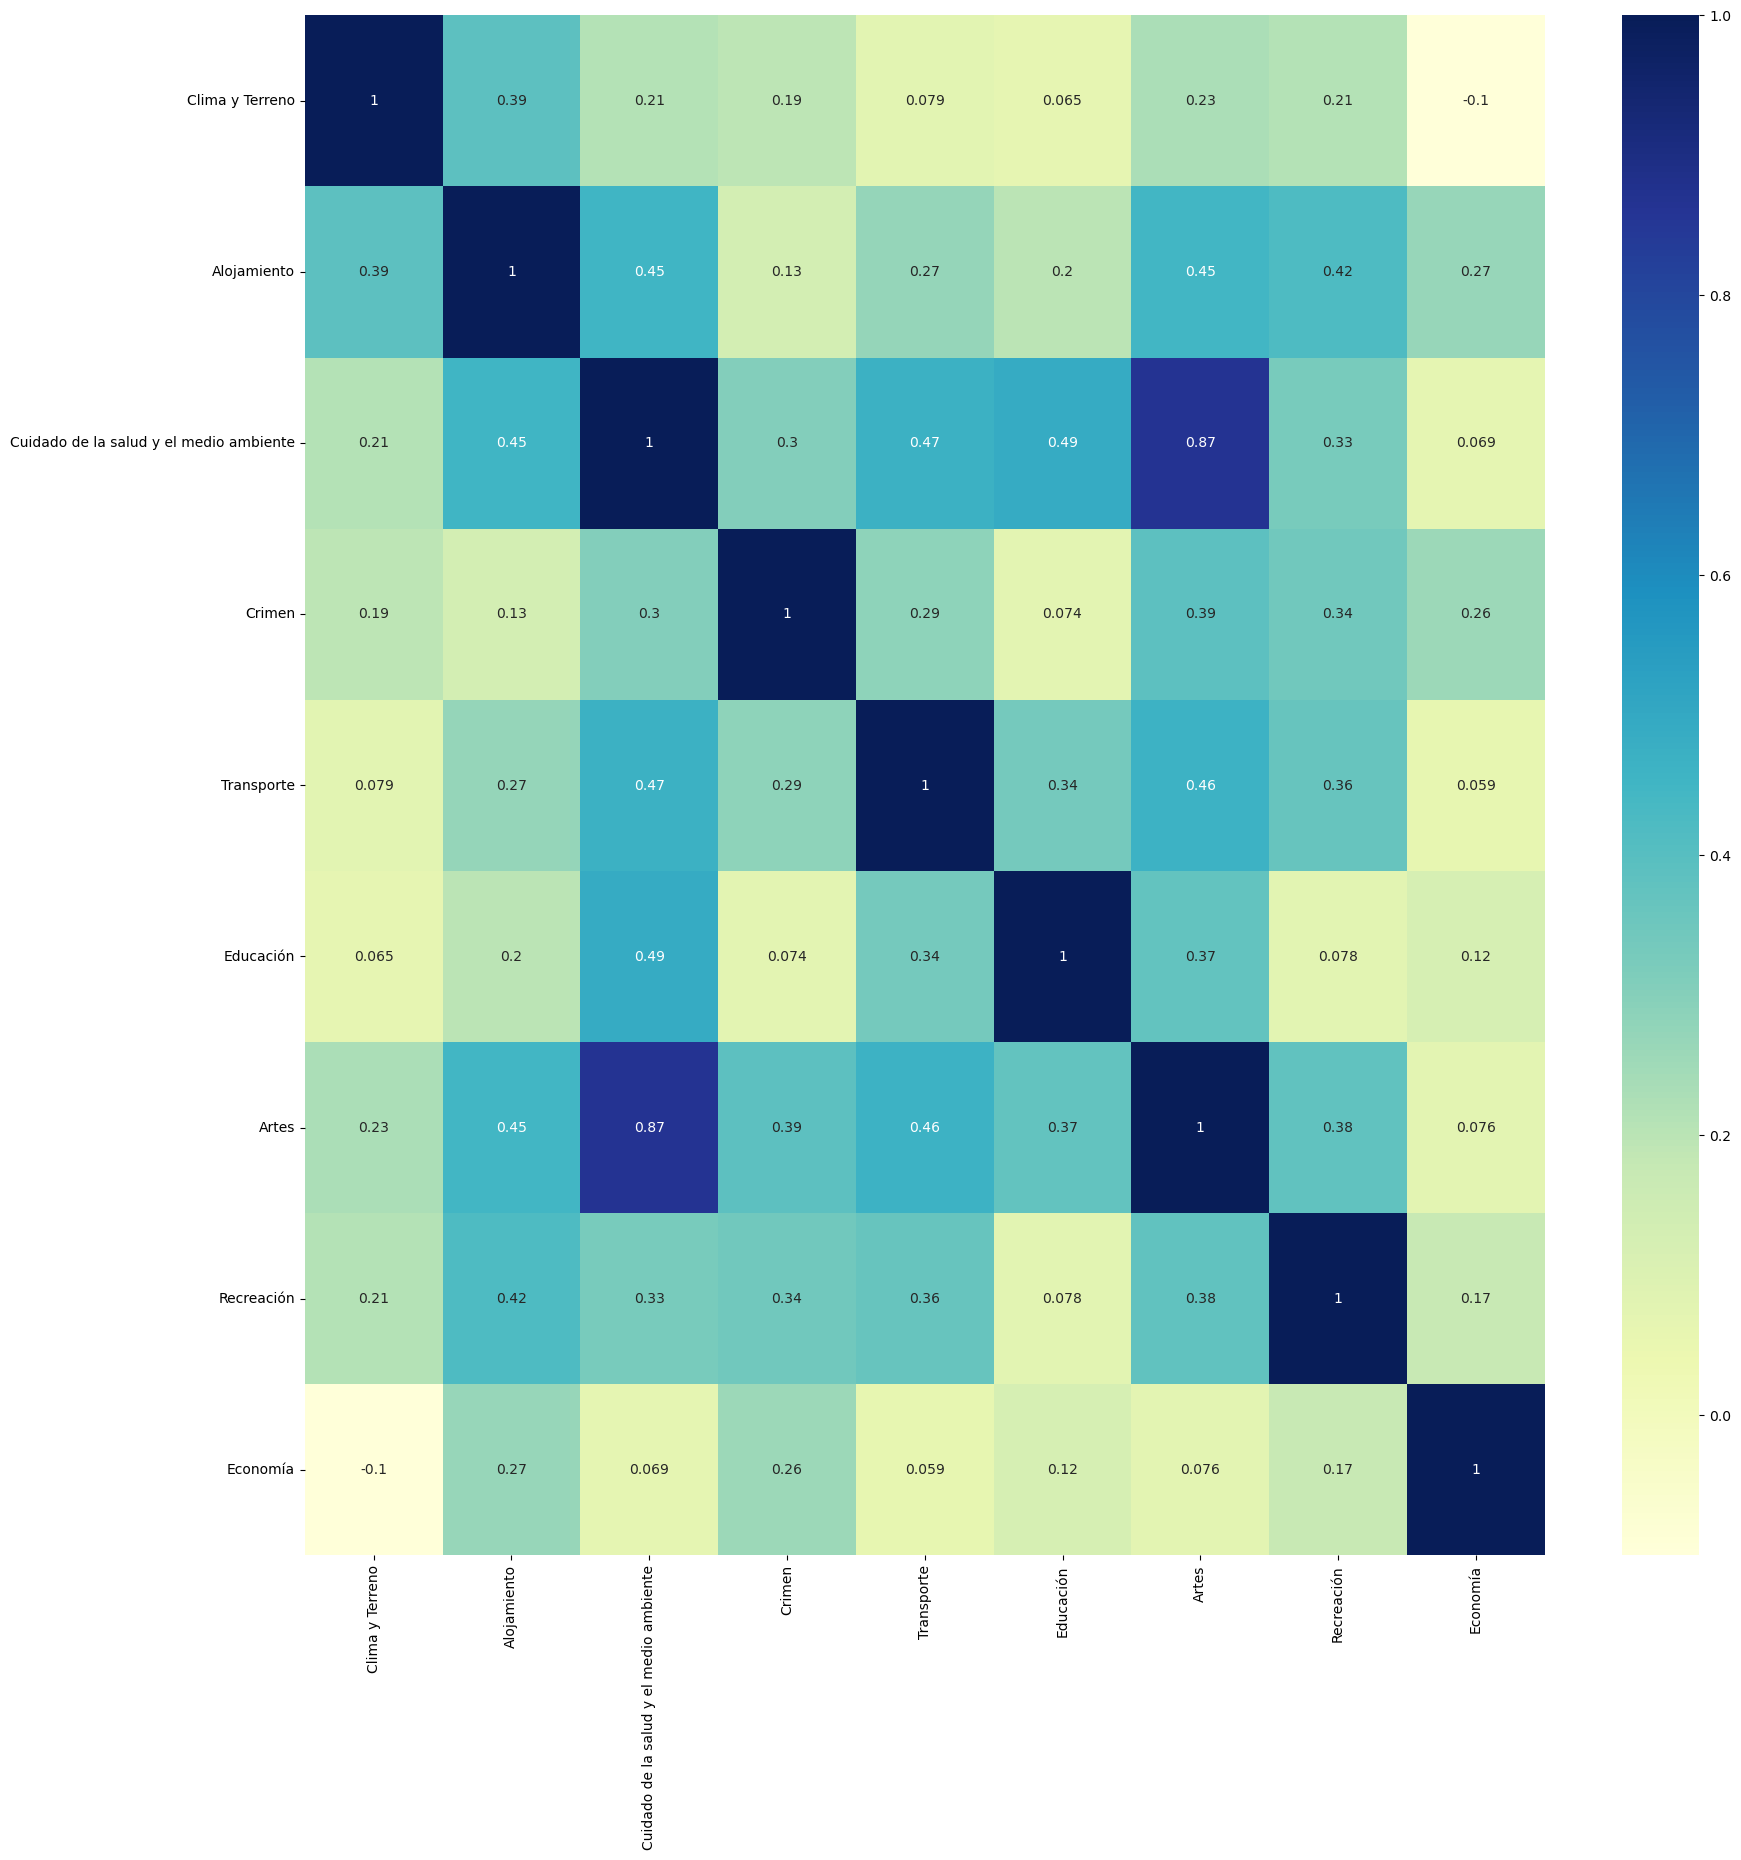

In [9]:
plt.figure(figsize=(20,20))
dataplot = sb.heatmap(X.corr(), cmap="YlGnBu", annot=True)
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

Iniciamos el análisis revisando si existe una cantidad considerable de valores nulos en alguna de las columnas del conjunto de datos.  A través del método info(), podemos evidenciar que no existen valores nulos en ninguna de ellas.

Luego obtenemos las estadísticas descriptivas tales como media, desviación estándar y percentiles usando el método describe() de la librería Pandas, para tener una aproximación a la distribución de los datos, encontrando que:
- Alojamiento y Economía son los atributos cuya calificación presenta las medias más altas, lo que sugiere que la mayoría de ciudades tienen puntuaciones altas en estos aspectos
- Lo anterior lo podemos contrastar con los valores máximos para cada atributo, encontrando que Alojamiento y Economía presentan los mayores valores, y en el otro extremo se encuentran Artes y Cuidado de la salud y el medio ambiente siendo los atributos que presentan los puntajes más pequeños
- Observando los valores de los percentiles 25, 50 y 75 notamos que las diferencias entre sus valores para Artes, Recreación y Economía indican que estos atributos presentan para el 75% de los datos puntuaciones por encima de la media.  Esto podría evidenciarse mejor con algunos histogramas.

Posteriormente realizamos un análisis de correlación usando la función corr() y graficando estos valores para facilitar la interpretación de cuáles de estos atributos podrían estar más relacionados entre sí.
- La gráfica de correlación nos muestra que el Cuidado de la salud y el medio ambiente está bastante correlacionado con el atributo Artes, por lo cual esperamos que al realizar el análisis de componentes principales alguna de estas dos variables no esté presente como componente principal

### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso. 

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

In [11]:
# Utilice este espacio para escribir el código.
# Escalamos el conjunto de datos
scaler = StandardScaler(with_std=True, with_mean=True)
X_scaled = scaler.fit_transform(X.loc[:, X.columns != 'Ciudad'])

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

El primer paso para el análisis de componentes principales consiste en escalar los valores del conjunto de resultados, para esta tarea nos apoyamos en la clase StandardScaler de scikit-learn.  Como se pudo observar en el análisis exploratorio de los datos, la escala de puntuaciones de cada tributo presentan valores muy diversos.  Aplicando este escalamiento logramos ajustar los valores de las variables para que tengan una distribución similar y puedan ser comparables dentro de un mismo rango numérico.  Esto es importante realizarlo antes de identificar los componentes principales porque:
- Nivelamos la "contribución" de todas las variables.  Si las variables tienen diferentes rangos o magnitudes, las variables con valores más altos dominarán la variabilidad y las variables con valores más bajos tendrán menos influencia
- Los algoritmos de PCA son sensibles a la escala de los datos.  Podríamos terminar identificando atributos principales, sesgados por sus valores altos y no realmente por su importancia en la explicación de un comportamiento.
- Desde el punto de vista computacional, nivelar los rangos de valores también permite que estos algoritmos de PCA puedan ejecutarse de una manera óptima.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

### 4.  Interpretación de los componentes principales. 

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, los pesos obtenidos pueden identificar dimensiones menores de los datos? Dé una interpretación a estas dimensiones, para ello puede utilizar gráficas, tablas, etc.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).